In [1]:
import os
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import multiprocessing
# multiprocessing.set_start_method('forkserver')
from torch.utils.data import DataLoader
from LatentPixel import TGraph, init_render, get_pixel_pretrain_dataloader, ModelType, RenderConfig, LPixelForPreTraining
from tqdm import tqdm

from datasets import load_dataset

rconfig = RenderConfig(dpi=240, pixels_per_patch=32)

_ = init_render(rconfig)


In [2]:
model = LPixelForPreTraining(ModelType.SD, 0.25, [4, 32 * 529 // 8], 4, 'storage/checkpoints/lpixel_pretrain/lpixel_pretrain/LPixelForPreTraining/20230716-230628/2000/backbone', 'storage/SD2_VQGAN', keep_decoder=True)

In [10]:
img = TGraph.from_text('This is a sentence')

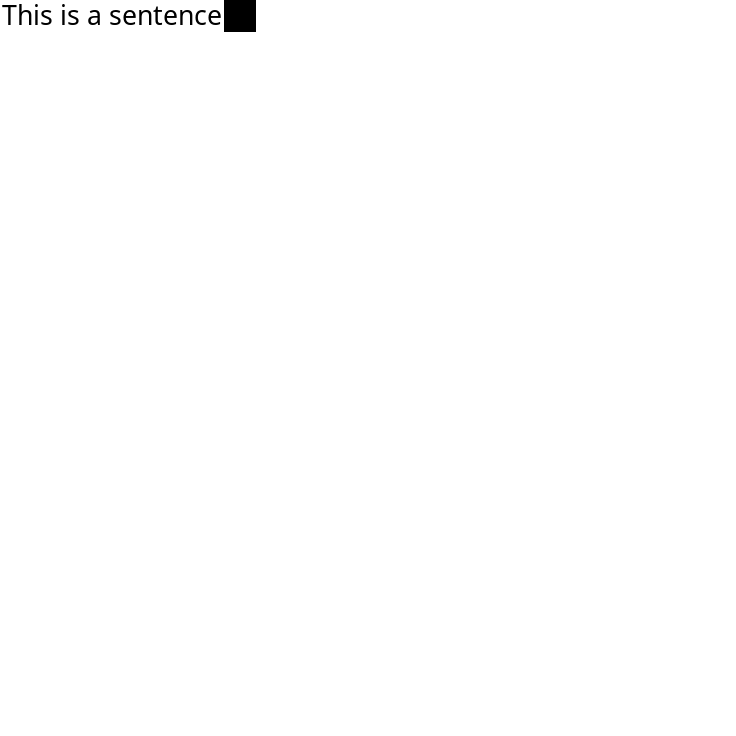

In [11]:
img.squarelize().to_PIL()

In [12]:
pixel_values = img.unsquarelize().to_SD()
attention_mask = img.unsquarelize().get_attention_mask()

In [13]:
result = model.forward(pixel_values.unsqueeze(0), attention_mask.unsqueeze(0))

/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [14]:
rimg = TGraph.from_SD(result.logits, False)

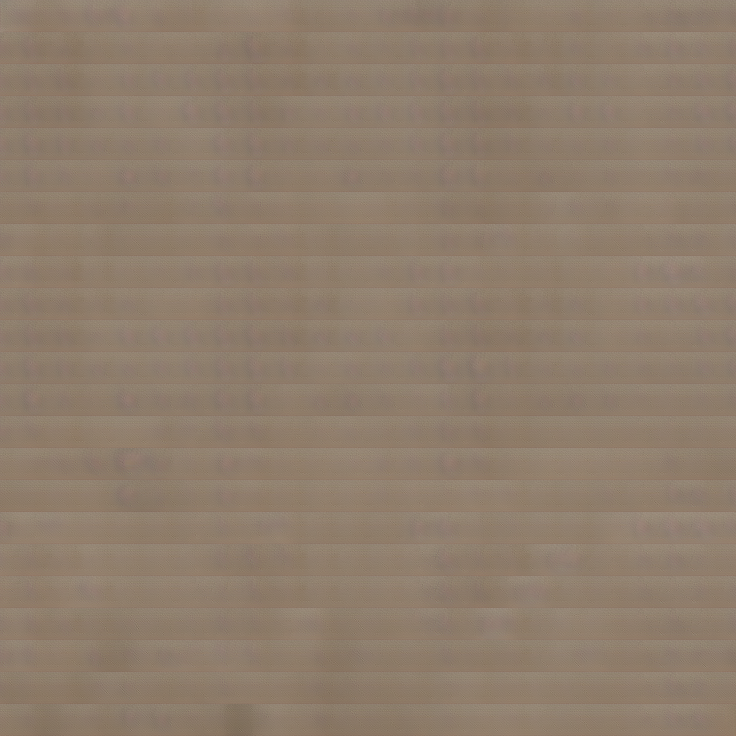

In [15]:
rimg.squarelize().to_PIL()[0]

In [6]:
data_paths = ['storage/enwiki', 'storage/bookcorpus']
loader = get_pixel_pretrain_dataloader(
    paths=data_paths,
    batch_size=64,
    num_workers=1,
    seed=42,
    model_type=None,
    pin_memory_device='cpu',
    streaming=True
)

Datasets loaded from ['storage/bookcorpus', 'storage/enwiki']
Convert the dataset into a streaming dataset
128
128
Begin to interleave datasets
128
128


In [7]:
it = iter(loader)
for i in tqdm(range(300)):
    batch = next(it)
    # batch.to_device('cuda')
    # batch.to_SD()

pid 498435's current affinity mask: 1000000001
pid 498435's new affinity mask: ffffffffff


100%|██████████| 300/300 [01:42<00:00,  2.92it/s]


In [8]:
batch.to_pixel()

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.6157,  ..., 1